![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

### Package Version:
- tensorflow==2.2.0
- pandas==1.0.5
- numpy==1.18.5
- google==2.0.3

# Sarcasm Detection

### Dataset

#### Acknowledgement
Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

### Load Data (3 Marks)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
import os
os.chdir("gdrive/My Drive/Colab Notebooks")
os.listdir()

['1. Tensorflow_Hello_World_tf2.ipynb',
 '2a. Boston Housing Prices (2).ipynb',
 '2a. Boston Housing Prices (1).ipynb',
 '2b. Boston Housing Prices_Eager_Normalization (1).ipynb',
 '4. Classification_MNIST_Logistic_Keras (1).ipynb',
 '6. Classification_MNIST_DNN_Keras (1).ipynb',
 'Case_study_neural_network_bangalore_june-1.ipynb',
 'prices.csv',
 'Questions - Internal - R6 - AIML Labs.ipynb',
 'MNIST_FASHION_Exercise.ipynb',
 'Updated_R7_ExternalLab_Questions (1).ipynb',
 'SVHN_single_grey1-2.h5',
 'Untitled (4)',
 'CNN_Basics_MNIST (1).ipynb',
 'Project2DNN.ipynb',
 'Untitled (3)',
 'CV_Project2_Dog_Breed_Classification_Questions (1).ipynb',
 'sms.tsv',
 'Lab1_textAnalytics.ipynb',
 'Untitled (2)',
 'Lab2_textClassificationExercise.ipynb',
 'Untitled (1)',
 'Lab4_Stemming _ Lemmatization using NLTK.ipynb',
 'Lab3_Text Classification With Advanced ML.ipynb',
 'Lab6_Word2vec_gensim_movie_data.ipynb',
 'Untitled0.ipynb',
 'Lab1_TimeSeries - Air Passengers Traffic.ipynb',
 'Untitled1.ipy

In [3]:
import pandas as pd
df = pd.read_json("Sarcasm_Headlines_Dataset.json", lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [4]:
df.shape

(26709, 3)

### Drop `article_link` from dataset (3 Marks)

In [5]:
df = df.drop(['article_link'], axis=1)
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


### Get length of each headline and add a column for that (3 Marks)

In [37]:
# df['len'] = df['headline'].apply(lambda x: len(x.split(" ")))
df['len'] = df['headline'].str.len()
df.head()

,headline,is_sarcastic,len
0,former versace store clerk sues over secret 'b...,0,78
1,the 'roseanne' revival catches up to our thorn...,0,84
2,mom starting to fear son's web series closest ...,1,79
3,"boehner just wants wife to listen, not come up...",1,84
4,j.k. rowling wishes snape happy birthday in th...,0,64


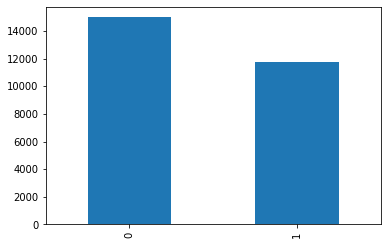

In [38]:
import matplotlib.pyplot as plt
df['is_sarcastic'].value_counts().plot.bar()

In [39]:
df.describe()

,is_sarcastic,len
count,26709.000000,26709.000000
mean,0.438953,60.910592
std,0.496269,19.184470
min,0.000000,7.000000
25%,0.000000,48.000000
50%,0.000000,61.000000
75%,1.000000,73.000000
max,1.000000,254.000000


### Initialize parameter values
- Set values for max_features, maxlen, & embedding_size
- max_features: Number of words to take from tokenizer(most frequent words)
- maxlen: Maximum length of each sentence to be limited to 25
- embedding_size: size of embedding vector

In [40]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [41]:
!pip install Keras

In [42]:
!pip install CuDNNLSTM

ERROR: Could not find a version that satisfies the requirement CuDNNLSTM (from versions: none)
ERROR: No matching distribution found for CuDNNLSTM


In [43]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# CuDNNLSTM,
from keras.layers import Dense, Input,  Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D, LSTM
from keras.models import Model, Sequential

In [44]:
max_features = 10000
maxlen = 25
embedding_size = 200

### Apply `tensorflow.keras` Tokenizer and get indices for words (3 Marks)
- Initialize Tokenizer object with number of words as 10000
- Fit the tokenizer object on headline column
- Convert the text to sequence


In [45]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(df['headline']))
X = tokenizer.texts_to_sequences(df['headline'])

### Pad sequences (3 Marks)
- Pad each example with a maximum length
- Convert target column into numpy array

In [46]:
X = pad_sequences(X, maxlen = maxlen)
y = np.array(df['is_sarcastic'])

In [47]:
print(X.shape)
print(y.shape)

(26709, 25)
(26709,)


### Vocab mapping
- There is no word for 0th index

In [48]:
tokenizer.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'from': 14,
 'at': 15,
 'about': 16,
 'you': 17,
 'this': 18,
 'by': 19,
 'after': 20,
 'up': 21,
 'out': 22,
 'be': 23,
 'how': 24,
 'as': 25,
 'it': 26,
 'that': 27,
 'not': 28,
 'are': 29,
 'your': 30,
 'his': 31,
 'what': 32,
 'he': 33,
 'all': 34,
 'just': 35,
 'who': 36,
 'has': 37,
 'will': 38,
 'more': 39,
 'one': 40,
 'into': 41,
 'report': 42,
 'year': 43,
 'why': 44,
 'have': 45,
 'area': 46,
 'over': 47,
 'donald': 48,
 'u': 49,
 'day': 50,
 'says': 51,
 's': 52,
 'can': 53,
 'first': 54,
 'woman': 55,
 'time': 56,
 'like': 57,
 'her': 58,
 "trump's": 59,
 'old': 60,
 'no': 61,
 'get': 62,
 'off': 63,
 'an': 64,
 'life': 65,
 'people': 66,
 'obama': 67,
 'now': 68,
 'house': 69,
 'still': 70,
 "'": 71,
 'women': 72,
 'make': 73,
 'was': 74,
 'than': 75,
 'white': 76,
 'back': 77,
 'my': 78,
 'i': 79,
 'clinton': 80,
 'down': 81,
 'i

In [49]:
num_words = len(tokenizer.word_index.items())
num_words

29656

### Set number of words
- Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary

In [50]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

29657


### Load Glove Word Embeddings (3 Marks)

In [51]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

### Create embedding matrix

In [52]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

### Define model (5 Marks)
- Hint: Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.

In [53]:
model=Sequential()
# Non-trainable embedding layer
model.add(Embedding(num_words, embedding_size, weights=[embedding_matrix]))
# Bidirectional LSTM 
model.add(Bidirectional(LSTM(100, return_sequences=True, dropout=0.25, recurrent_dropout=0.1)))
# Dense and Dropout layers
model.add(GlobalMaxPool1D())
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(25, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))


### Compile the model (3 Marks)

In [54]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 200)         5931400   
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 200)         240800    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0

### Fit the model (4 Marks)

In [56]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3 , random_state = 25)

In [60]:
batch_size = 100
epochs = 10
validation_split = 0.2
model.fit(x=X_train, y=y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

Epoch 1/10
150/150 [==============================] - 38s 251ms/step - loss: 0.3692 - accuracy: 0.8463 - val_loss: 0.3407 - val_accuracy: 0.8422
Epoch 2/10
150/150 [==============================] - 37s 249ms/step - loss: 0.2569 - accuracy: 0.8994 - val_loss: 0.3048 - val_accuracy: 0.8666
Epoch 3/10
150/150 [==============================] - 38s 253ms/step - loss: 0.1871 - accuracy: 0.9274 - val_loss: 0.3161 - val_accuracy: 0.8757
Epoch 4/10
150/150 [==============================] - 38s 254ms/step - loss: 0.1372 - accuracy: 0.9489 - val_loss: 0.3929 - val_accuracy: 0.8671
Epoch 5/10
150/150 [==============================] - 37s 249ms/step - loss: 0.1034 - accuracy: 0.9631 - val_loss: 0.4411 - val_accuracy: 0.8717
Epoch 6/10
150/150 [==============================] - 37s 249ms/step - loss: 0.0731 - accuracy: 0.9736 - val_loss: 0.4543 - val_accuracy: 0.8684
Epoch 7/10
150/150 [==============================] - 38s 251ms/step - loss: 0.0559 - accuracy: 0.9810 - val_loss: 0.5469 - val_ac

In [61]:
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100)

251/251 [==============================] - 4s 15ms/step - loss: 0.7895 - accuracy: 0.8499
Accuracy of the model on Testing Data is -  84.98689532279968


In [26]:
# batch_size = 100
# epochs = 5
# validation_split = 0.2

# model.fit(x=X, y=y, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

Epoch 1/5
214/214 [==============================] - 53s 249ms/step - loss: 0.0104 - accuracy: 0.9961 - val_loss: 1.3238 - val_accuracy: 0.8559
Epoch 2/5
214/214 [==============================] - 53s 250ms/step - loss: 0.0055 - accuracy: 0.9980 - val_loss: 1.6506 - val_accuracy: 0.8529
Epoch 3/5
214/214 [==============================] - 53s 249ms/step - loss: 0.0084 - accuracy: 0.9971 - val_loss: 1.4419 - val_accuracy: 0.8517
Epoch 4/5
214/214 [==============================] - 53s 249ms/step - loss: 0.0084 - accuracy: 0.9971 - val_loss: 1.8026 - val_accuracy: 0.8527
Epoch 5/5
214/214 [==============================] - 53s 250ms/step - loss: 0.0076 - accuracy: 0.9975 - val_loss: 1.3959 - val_accuracy: 0.8570
